# <span style="color:blue"> Esercitazione 9 - Algoritmi Genetici e Ottimizzazione </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 9.1 - Il Problema del commesso viaggiatore](#Esercizio9.1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

## <span id="Esercizio9.1" style="color:blue">  Esercizio 9.1 - Il Problema del commesso viaggiatore </span>[^](#toc)

### 0. Breve descrizione

Il **Problema del Commesso Viaggiatore** (TSP, _traveling salesman problem_) consiste nel determinare il percorso di lunghezza minima che permette di visitare un insieme di $N$ città, ciascuna con posizione $\vec{c}_i$, ritornando infine alla città di partenza. Il vincolo è che ogni città venga visitata una sola volta e che il cammino sia chiuso.

Un possibile percorso è descritto da una permutazione delle città $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$, con la condizione di chiusura $\vec{x}_{N+1} = \vec{x}_1$.

Il costo del percorso può essere definito mediante una delle seguenti funzioni:$$L^{(1)}(\vec{x}_1, \ldots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i - \vec{x}_{i+1}| \quad \mathrm{e} \quad L^{(2)}(\vec{x}_1, \ldots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i - \vec{x}_{i+1}|^2$$
Una soluzione può essere rappresentata tramite un vettore 1D che contiene l’ordine di visita delle città.

Per risolvere il problema si utilizza un _algoritmo genetico_.
- Ogni individuo della popolazione è equivalente ad un _cromosoma_ che rappresenta una permutazione valida delle città (con la prima città fissata in testa).
- La _qualità_ di ciascun individuo viene valutata (e oridnata) tramite una funzione di _fitness_ costruita a partire dal _costo_ del percorso.
- La selezione dei _genitori_ è basata sul rango, ovvero la posizione nell'ordinamento.

Per esplorare lo spazio delle soluzioni vengono applicati operatori di _crossover_ e _mutazione_, sempre rispettando il vincolo che ogni città compaia una sola volta nel percorso.

Ad ogni generazione i nuovi individui sostituiscono la popolazione precedente e il processo viene ripetuto per un numero prefissato di iterazioni.

**Algoritmo genetico**:
- il percorso è rappresentato come una permutazione delle città, con la prima città fissata in testa. La qualità di ciascun individuo è valutata tramite la funzione costo $L^{(2)}$, e la _fitness_ è definita in modo inversamente proporzionale alla lunghezza del percorso;
- la popolazione iniziale è generata casualmente e ordinata in base alla fitness. La selezione dei genitori avviene mediante rank selection, così da favorire gli individui migliori mantenendo comunque una componente stocastica;
- l’evoluzione della popolazione avviene tramite operatori di crossover e diverse mutazioni;

Ad ogni generazione vengono monitorati:
- la lunghezza del miglior percorso,
- la lunghezza media sulla metà migliore della popolazione,
- in modo da valutare l’andamento e la convergenza dell’algoritmo.

La convergenza dell'algoritmo è valutata monitorando, ad ogni generazione, la lunghezza del miglior percorso e la lunghezza media dei percorsi sulla metà migliore della popolazione.

### i. Città disposte lungo una circonferenza

Per risolvere il problema nel caso in cui $34$ città sono distribuite in posizioni casuali lungo una circonferenza (estratte da una distribuzione uniforme) di raggio $1$, sono stati scelti i seguenti parametri:
- $100$ individui
- $500$ generazioni
- probabilità di crossover $p_{\mathrm{cross}}=80$% (deve essere $>50%$)
- probabilità di mutazione (ciascuna deve essere $<10%$):
    - swap: $p_{\mathrm{swap}}=6$%
    - inversione: $p_{\mathrm{inv}}=5$%
    - shift: $p_{\mathrm{shift}}=4$%
    - permutazione in blocco: $p_{\mathrm{mperm}}=3$%
- $p_{\mathrm{sel}}=2$ come esponente della relazione $j= int(M \times r^{p_{\mathrm{sel}}})+1$

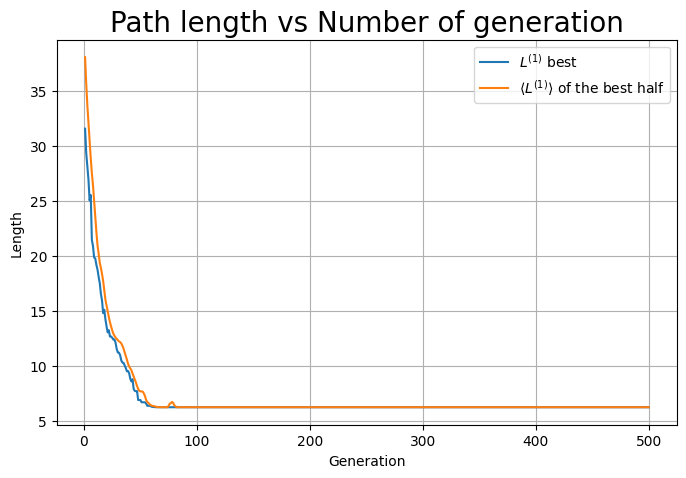

In [2]:
plt.figure(figsize=(8,5))
Gen,BestL=np.loadtxt('../Es09/Output/circle/best_length.dat',skiprows=1,unpack=True)
Gen,BestHL=np.loadtxt('../Es09/Output/circle/avg_best_half_length.dat',skiprows=1,unpack=True)

plt.plot(Gen,BestL,label='$L^{(1)}$ best')
plt.plot(Gen,BestHL,label=r'$\langle L^{(1)} \rangle$ of the best half')
plt.xlabel('Generation', fontsize=10)
plt.ylabel('Length', fontsize=10)
plt.title('Path length vs Number of generation', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

Si può notare come
- la convergenza al valore atteso $\simeq 2\pi$ (percorso che seque la circonferenza, senza mai "tagliarla") si verifichi entro $80-90$ generazioni;
- non ci sia una sostanziale differenza tra l'intera popolazione e la metà migliore. Questo significa che, durante tutta l'evoluzione, quasi tutta (o tutta, dalla $80$-$90$-esima generazione in poi) la popolazione segue la soluzione ottimale.

Il risultato della simulazione (lunghezza del percorso ottimale trovato) è:

In [3]:
print(BestL[-1])

6.24306


Di seguito si mostrano il percorsi seguiti, rispettivamente, dalla prima e dall'ultima generazione. Si nota chiaramente come il percorso ottimale risulti essere quello che segue le città "lungo la circonferenza".

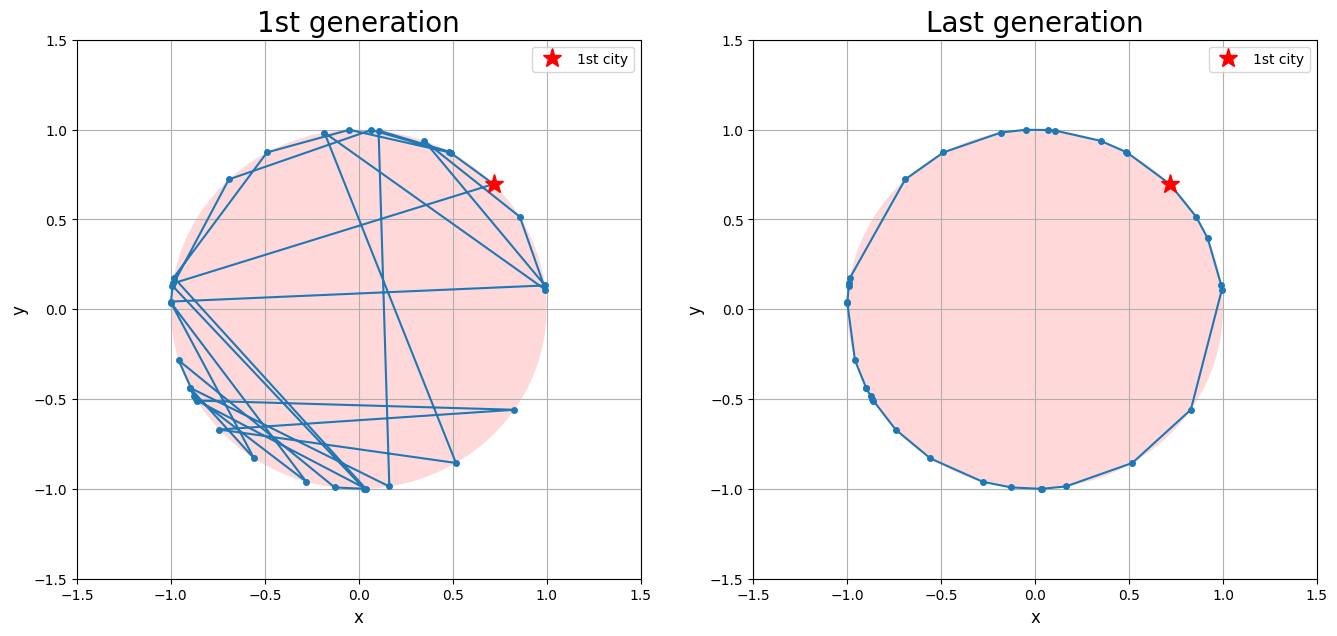

In [4]:
plt.figure(figsize=(16,7))
x,y=np.loadtxt('../Es09/Output/circle/best_path.dat',skiprows=1,usecols=(1,2),unpack=True)
N=34
# 1st generation
plt.subplot(1,2,1)
x_0=x[0:N-1]
y_0=y[0:N-1]
plt.plot(np.r_[x_0, x_0[0]],np.r_[y_0, y_0[0]],marker='o',markersize=4)
plt.plot(x[0],y[0],marker='*',color='r',markersize=14,linestyle='',label='1st city')
circle=plt.Circle((0,0),1.0,fc='r',alpha=0.15)
plt.gca().add_patch(circle)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('1st generation',fontsize=20)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)
plt.legend()
# Last generation
plt.subplot(1,2,2)
x_f=x[-N:]
y_f=y[-N:]
plt.plot(np.r_[x_f,x_f[0]],np.r_[y_f, y_f[0]],marker='o',markersize=4)
plt.plot(x[0],y[0],marker='*',color='r',markersize=14,linestyle='',label='1st city')
circle=plt.Circle((0,0),1.,fc='r',alpha=0.15)
plt.gca().add_patch(circle)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('Last generation',fontsize=20)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)
plt.legend()

plt.show()

### ii. Città disposte all'interno di un quadrato

Per risolvere il problema nel caso in cui $34$ città sono distribuite in posizioni casuali entro un quadrato di lato $2$ (estratte da una distribuzione uniforme), sono stati scelti i seguenti parametri:
- $100$ individui
- $500$ generazioni
- probabilità di crossover $p_{\mathrm{cross}}=80$%
- probabilità di mutazione:
    - swap: $p_{\mathrm{swap}}=6$%
    - inversione: $p_{\mathrm{inv}}=5$%
    - shift: $p_{\mathrm{shift}}=4$%
    - permutazione in blocco: $p_{\mathrm{mperm}}=3$%
- $p_{\mathrm{sel}}=2$

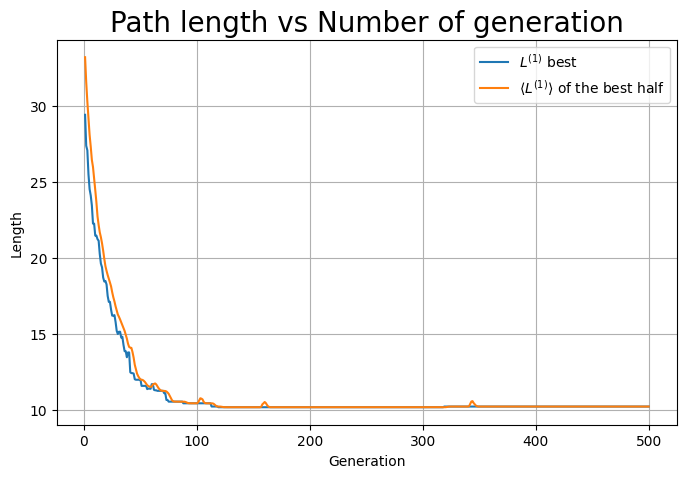

In [5]:
plt.figure(figsize=(8,5))
Gen,BestL=np.loadtxt('../Es09/Output/square/best_length.dat',skiprows=1,unpack=True)
Gen,BestHL=np.loadtxt('../Es09/Output/square/avg_best_half_length.dat',skiprows=1,unpack=True)

plt.plot(Gen,BestL,label='$L^{(1)}$ best')
plt.plot(Gen,BestHL,label=r'$\langle L^{(1)} \rangle$ of the best half')
plt.xlabel('Generation', fontsize=10)
plt.ylabel('Length', fontsize=10)
plt.title('Path length vs Number of generation', fontsize=20)
plt.grid(True)
plt.xlim()
plt.legend()
plt.show()

Si può notare come, anche in questo caso
- la convergenza al minimo si verifichi entro poche generazioni (circa $130$)
- non ci sia sostanziale differenza tra l'intera popolazione e la metà migliore

Il risultato della simulazione (lunghezza del percorso ottimale trovato) è:

In [6]:
print(BestL[-1])

10.2004


Di seguito si mostrano il percorsi seguiti, rispettivamente, dalla prima e dall'ultima generazione.

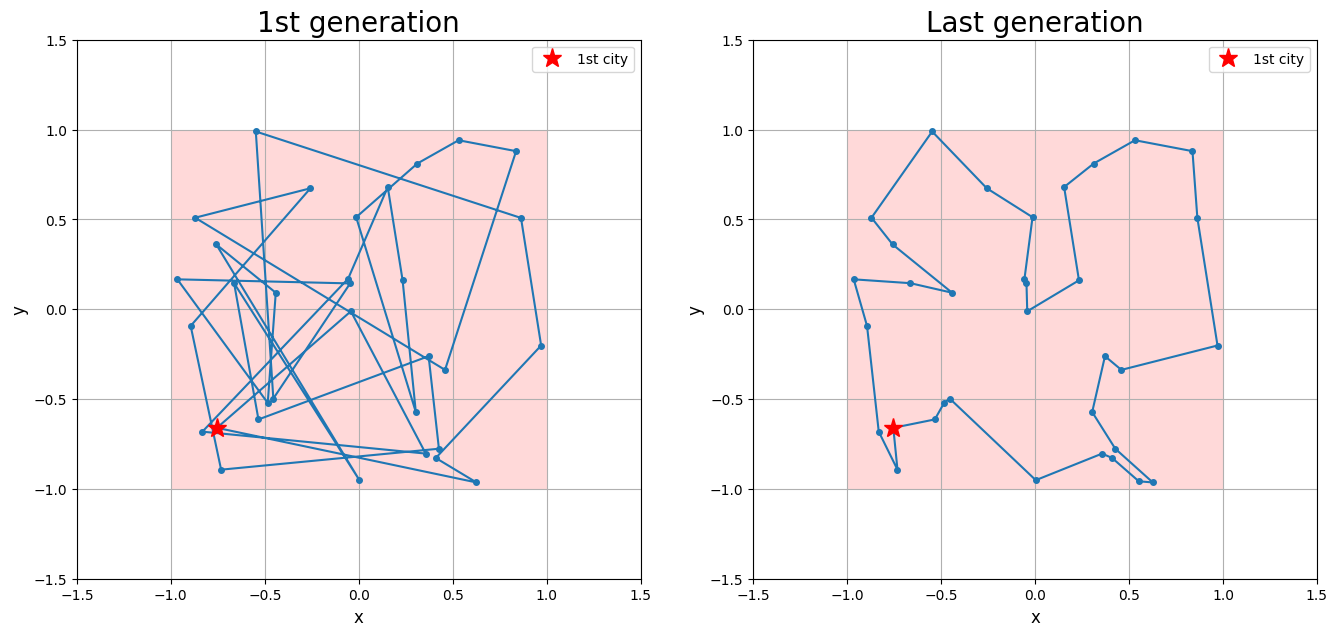

In [7]:
plt.figure(figsize=(16,7))
x,y=np.loadtxt('../Es09/Output/square/best_path.dat',skiprows=1,usecols=(1,2),unpack=True)
N=34
# 1st generation
plt.subplot(1,2,1)
x_0=x[0:N-1]
y_0=y[0:N-1]
plt.plot(np.r_[x_0, x_0[0]],np.r_[y_0, y_0[0]],marker='o',markersize=4)
plt.plot(x[0],y[0],marker='*',color='r',markersize=14,linestyle='',label='1st city')
square=Rectangle((-1,-1),2,2,fc='r',alpha=0.15)
plt.gca().add_patch(square)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('1st generation',fontsize=20)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)
plt.legend()
# Last generation
plt.subplot(1,2,2)
x_f=x[-N:]
y_f=y[-N:]
plt.plot(np.r_[x_f,x_f[0]],np.r_[y_f, y_f[0]],marker='o',markersize=4)
plt.plot(x[0],y[0],marker='*',color='r',markersize=14,linestyle='',label='1st city')
square=Rectangle((-1,-1),2,2,fc='r',alpha=0.15)
plt.gca().add_patch(square)
plt.xlabel('x',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('Last generation',fontsize=20)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)
plt.legend()

plt.show()